# Setup FTDI side

In [9]:
import sys;
import select;
import socket;
import time;
import os;
import numpy as np
import random;
import ctypes;
from time import sleep;
import time;
import ftd3xx
import sys
import ftd3xx._ftd3xx_linux as _ft
ftd3xx.__file__

'/home/pi/.local/lib/python3.7/site-packages/ftd3xx/__init__.py'

In [10]:
print(sys.platform)
def ReadPipe(D3XX, pipe, size):
    return D3XX.readPipeEx(pipe-0x82, size)

def CancelPipe(D3XX, pipe):

    if sys.platform == 'linux':
        return D3XX.flushPipe(pipe)

    return D3XX.abortPipe(pipe)

linux


In [11]:
numDevices = ftd3xx.createDeviceInfoList()
if (numDevices == 0):
    print("ERROR: No FTD3XX device is detected.");
else:
    print(numDevices," Device")
devList = ftd3xx.getDeviceInfoList()
print(devList)
# Just open the first device (index 0)
devIndex = 0;
D3XX = ftd3xx.create(devIndex, _ft.FT_OPEN_BY_INDEX);  
D3XX

1  Device


In [12]:
cfg = D3XX.getChipConfiguration();
print("CLK: ",cfg.FIFOClock)
print("Mode: ",cfg.FIFOMode)
print("FlashEEPROMDetection: ",cfg.FlashEEPROMDetection)
VP = D3XX.getVIDPID()
print("VID/PID:",hex(VP[0]), hex(VP[1]))

CLK:  0
Mode:  0
FlashEEPROMDetection:  16
VID/PID: 0x60 0x1e


In [13]:
print("Last error:", D3XX.getLastError())
#print("Flush: ",D3XX.flushPipe(0x82))



Last error: 0


In [16]:

DATA = []
t = []
for k in range(10000):
    start = time.time()
    d = D3XX.readPipeEx(0, 1*4096)["bytes"]
    #d = ReadPipe(D3XX,0x82,4096)["bytes"]
    t.append(start - time.time())
    DATA.append(d)

In [7]:
D3XX.close()

In [17]:
t

[-0.00019407272338867188,
 -3.123283386230469e-05,
 -2.8371810913085938e-05,
 -2.6702880859375e-05,
 -2.6464462280273438e-05,
 -2.6941299438476562e-05,
 -2.574920654296875e-05,
 -2.5033950805664062e-05,
 -2.5272369384765625e-05,
 -2.47955322265625e-05,
 -2.5272369384765625e-05,
 -2.47955322265625e-05,
 -2.5272369384765625e-05,
 -2.47955322265625e-05,
 -2.5033950805664062e-05,
 -2.4557113647460938e-05,
 -2.5033950805664062e-05,
 -2.5033950805664062e-05,
 -2.5272369384765625e-05,
 -2.4557113647460938e-05,
 -2.5033950805664062e-05,
 -2.4557113647460938e-05,
 -2.5033950805664062e-05,
 -2.47955322265625e-05,
 -2.47955322265625e-05,
 -2.4557113647460938e-05,
 -2.5272369384765625e-05,
 -2.4318695068359375e-05,
 -2.5033950805664062e-05,
 -2.4557113647460938e-05,
 -2.47955322265625e-05,
 -2.4557113647460938e-05,
 -2.4557113647460938e-05,
 -2.4557113647460938e-05,
 -2.5033950805664062e-05,
 -2.47955322265625e-05,
 -2.5272369384765625e-05,
 -2.47955322265625e-05,
 -2.5510787963867188e-05,
 -2.455

In [18]:
DATA[1]

b''

In [19]:
# Reset the FT600 to make sure starting fresh with nothing in FIFOs
#D3XX.resetDevicePort() # Flush
D3XX.close()

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline


In [19]:
len(DATA[383])

452

In [5]:
l

NameError: name 'l' is not defined

In [4]:
fig = plt.figure(figsize=(15, 5))
T = [-x for x in t]
l = np.array([len(x) for x in DATA])
l = l[1500:]
T = T[1500:]
T = np.array(T)/np.max(T)*np.max(l)
np.savez("test3_1x4096.npz",data=DATA,timings=t)
plt.plot(l)
plt.plot(T)

NameError: name 'plt' is not defined

In [33]:
t[:6000]

[-0.0008072853088378906,
 -0.00012183189392089844,
 -6.890296936035156e-05,
 -8.845329284667969e-05,
 -8.082389831542969e-05,
 -8.678436279296875e-05,
 -5.626678466796875e-05,
 -8.130073547363281e-05,
 -6.079673767089844e-05,
 -9.179115295410156e-05,
 -6.985664367675781e-05,
 -6.461143493652344e-05,
 -6.604194641113281e-05,
 -6.628036499023438e-05,
 -9.179115295410156e-05,
 -6.508827209472656e-05,
 -8.893013000488281e-05,
 -6.198883056640625e-05,
 -8.869171142578125e-05,
 -6.29425048828125e-05,
 -8.845329284667969e-05,
 -6.67572021484375e-05,
 -8.654594421386719e-05,
 -6.580352783203125e-05,
 -9.226799011230469e-05,
 -6.413459777832031e-05,
 -6.079673767089844e-05,
 -9.512901306152344e-05,
 -6.127357482910156e-05,
 -8.940696716308594e-05,
 -6.222724914550781e-05,
 -8.7738037109375e-05,
 -6.4849853515625e-05,
 -9.703636169433594e-05,
 -6.556510925292969e-05,
 -8.726119995117188e-05,
 -6.794929504394531e-05,
 -8.440017700195312e-05,
 -6.580352783203125e-05,
 -8.654594421386719e-05,
 -6.8

In [34]:
-4096*len(T[:6000])/np.sum(t[:6000])

110198359.73816465

```FT_STATUS
 FT_OK = 0
 FT_INVALID_HANDLE = 1
 FT_DEVICE_NOT_FOUND = 2
 FT_DEVICE_NOT_OPENED = 3
 FT_IO_ERROR = 4
 FT_INSUFFICIENT_RESOURCES = 5
 FT_INVALID_PARAMETER = 6
 FT_INVALID_BAUD_RATE = 7
 FT_DEVICE_NOT_OPENED_FOR_ERASE = 8
 FT_DEVICE_NOT_OPENED_FOR_WRITE = 9
 FT_FAILED_TO_WRITE_DEVICE = 10
 FT_EEPROM_READ_FAILED = 11
 FT_EEPROM_WRITE_FAILED = 12
 FT_EEPROM_ERASE_FAILED = 13
 FT_EEPROM_NOT_PRESENT = 14
 FT_EEPROM_NOT_PROGRAMMED = 15
```

# Two

In [5]:
conf = _ft.FT_TRANSFER_CONF();
conf.wStructSize = ctypes.sizeof(_ft.FT_TRANSFER_CONF);
conf.pipe[_ft.FT_PIPE_DIR_IN].fPipeNotUsed = True;
conf.pipe[_ft.FT_PIPE_DIR_OUT].fPipeNotUsed = True;
conf.pipe.fReserved = False;
conf.pipe.fKeepDeviceSideBufferAfterReopen = False;
for i in range(4):
    ftd3xx.setTransferParams(conf, i);

In [4]:
numDevices = ftd3xx.createDeviceInfoList()
if (numDevices == 0):
    print("ERROR: No FTD3XX device is detected.");
else:
    print(numDevices," Device")
devList = ftd3xx.getDeviceInfoList()
print(devList)
# Just open the first device (index 0)
devIndex = 0;
D3XX = ftd3xx.create(devIndex, _ft.FT_OPEN_BY_INDEX);  
D3XX

# check if USB3 or USB2
devDesc = D3XX.getDeviceDescriptor();
bUSB3 = devDesc.bcdUSB >= 0x300;

# validate chip configuration
cfg = D3XX.getChipConfiguration();
cfg.FIFOClock

1  Device


1

In [5]:
cfg

In [8]:
desired_freq = 1;# 1=66 MHz, 0=100 MHz
if ( cfg.FIFOClock != desired_freq ):
    print("Changing FT600 Frequency");
    cfg.FIFOClock = desired_freq;
    D3XX.setChipConfiguration(cfg);


In [ ]:
D3XX.resetDevicePort(); # Flush
D3XX.close();

In [28]:
D3XX.setChipConfiguration(cfg);

In [29]:
numDevices = ftd3xx.createDeviceInfoList()
if (numDevices == 0):
    print("ERROR: No FTD3XX device is detected.");
else:
    print(numDevices," Device")
devList = ftd3xx.getDeviceInfoList()
print(devList)
devIndex = 0;
D3XX = ftd3xx.create(devIndex, _ft.FT_OPEN_BY_INDEX);


1  Device


In [9]:
cfg = D3XX.getChipConfiguration();
cfg.FIFOClock

cfg = D3XX.getChipConfiguration();
print("\tVendorID = %#06x" % cfg.VendorID)
print("\tProductID = %#06x" % cfg.ProductID)
cfg.FIFOMode,D3XX.getFirmwareVersion()

	VendorID = 0x0000
	ProductID = 0x0000


(0, 265)

In [6]:
conf = _ft.FT_TRANSFER_CONF();
conf.wStructSize = ctypes.sizeof(_ft.FT_TRANSFER_CONF);
conf.pipe[_ft.FT_PIPE_DIR_IN].fPipeNotUsed = True;
conf.pipe[_ft.FT_PIPE_DIR_OUT].fPipeNotUsed = True;
conf.pipe.fReserved = False;
conf.pipe.fKeepDeviceSideBufferAfterReopen = False;
for i in range(4):
    ftd3xx.setTransferParams(conf, i);

In [7]:
conf = _ft.FT_TRANSFER_CONF();
conf.wStructSize = ctypes.sizeof(_ft.FT_TRANSFER_CONF);
conf.pipe[_ft.FT_PIPE_DIR_IN].fPipeNotUsed = True;
conf.pipe[_ft.FT_PIPE_DIR_OUT].fPipeNotUsed = True;
conf.pipe.fReserved = False;
conf.pipe.fKeepDeviceSideBufferAfterReopen = False;
for i in range(4):
    ftd3xx.setTransferParams(conf, i);

linux


In [34]:
D3XX.flushPipe(0x82) 
D3XX.getLastError()

In [35]:
D3XX.getLastError()

0

In [36]:
numChannels = [4, 2, 1, 0, 0]
numChannels = numChannels[cfg.ChannelConfig]
numChannels

1

In [9]:
D3XX.readPipeEx(0x82, 4096)

{'bytesTransferred': 0, 'bytes': b''}

In [9]:
D3XX.resetDevicePort(); # Flush
D3XX.close();

In [10]:
import struct
import numpy as np

In [11]:
p = b'\xff,\xff-\xff.\xff/\xff0\xff1\xff2\xff3\xff8\xff9\xff:\xff;\xff4\xff5\xff6\xff7\xff<\xff=\xff>\xff?\xff@\xffA\xffB\xffC\xffH\xffI\xffJ\xffK\xffD\xffE\xffF\xffG\xffL\xffM\xffN\xffO\xffP\xffQ\xffR\xffS\xffX\xffY\xffZ\xff[\xffT\xffU\xffV\xffW\xff\\xff]\xff^\xff_\xff`\xffa\xffb\xffc\xffh\xffi\xffj\xffk\xffd\xffe\xfff\xffg\xffl\xffm\xffn\xffo\xffp\xffq\xffr\xffs\xffx\xffy\xffz\xff{\xfft\xffu\xffv\xffw\xff|\xff}\xff~\xff\x7f\xff\x80\xff\x81\xff\x82\xff\x83\xff\x88\xff\x89\xff\x8a\xff\x8b\xff\x84\xff\x85\xff\x86\xff\x87\xff\x8c\xff\x8d\xff\x8e\xff\x8f\xff\x90\xff\x91\xff\x92\xff\x93\xff\x98\xff\x99\xff\x9a\xff\x9b\xff\x94\xff\x95\xff\x96\xff\x97\xff\x9c\xff\x9d\xff\x9e\xff\x9f\xff\xa0\xff\xa1\xff\xa2\xff\xa3\xff\xa8\xff\xa9\xff\xaa\xff\xab\xff\xa4\xff\xa5\xff\xa6\xff\xa7\xff\xac\xff\xad\xff\xae\xff\xaf\xff\xb0\xff\xb1\xff\xb2\xff\xb3\xff\xb8\xff\xb9\xff\xba\xff\xbb\xff\xb4\xff\xb5\xff\xb6\xff\xb7\xff\xbc\xff\xbd\xff\xbe\xff\xbf\xff\xc0\xff\xc1\xff\xc2\xff\xc3\xff\xc8\xff\xc9\xff\xca\xff\xcb\xff\xc4\xff\xc5\xff\xc6\xff\xc7\xff\xcc\xff\xcd\xff\xce\xff\xcf\xff\xd0\xff\xd1\xff\xd2\xff\xd3\xff\xd8\xff\xd9\xff\xda\xff\xdb\xff\xd4\xff\xd5\xff\xd6\xff\xd7\xff\xdc\xff\xdd\xff\xde\xff\xdf\xff\xe0\xff\xe1\xff\xe2\xff\xe3\xff\xe8\xff\xe9\xff\xea\xff\xeb\xff\xe4\xff\xe5\xff\xe6\xff\xe7\xff\xec\xff\xed\xff\xee\xff\xef\xff\xf0\xff\xf1\xff\xf2\xff\xf3\xff\xf8\xff\xf9\xff\xfa\xff\xfb\xff\xf4\xff\xf5\xff\xf6\xff\xf7\xff\xfc\xff\xfd\xff\xfe\xff\xff\xff'
l = [ x for x in struct.unpack(str(len(p))+'B', p) if x < 255]
np.array(l)

array([ 44,  45,  46,  47,  48,  49,  50,  51,  56,  57,  58,  59,  52,
        53,  54,  55,  60,  61,  62,  63,  64,  65,  66,  67,  72,  73,
        74,  75,  68,  69,  70,  71,  76,  77,  78,  79,  80,  81,  82,
        83,  88,  89,  90,  91,  84,  85,  86,  87,  92, 120, 102, 102,
        93,  94,  95,  96,  97,  98,  99, 104, 105, 106, 107, 100, 101,
       102, 103, 108, 109, 110, 111, 112, 113, 114, 115, 120, 121, 122,
       123, 116, 117, 118, 119, 124, 125, 126, 127, 128, 129, 130, 131,
       136, 137, 138, 139, 132, 133, 134, 135, 140, 141, 142, 143, 144,
       145, 146, 147, 152, 153, 154, 155, 148, 149, 150, 151, 156, 157,
       158, 159, 160, 161, 162, 163, 168, 169, 170, 171, 164, 165, 166,
       167, 172, 173, 174, 175, 176, 177, 178, 179, 184, 185, 186, 187,
       180, 181, 182, 183, 188, 189, 190, 191, 192, 193, 194, 195, 200,
       201, 202, 203, 196, 197, 198, 199, 204, 205, 206, 207, 208, 209,
       210, 211, 216, 217, 218, 219, 212, 213, 214, 215, 220, 22

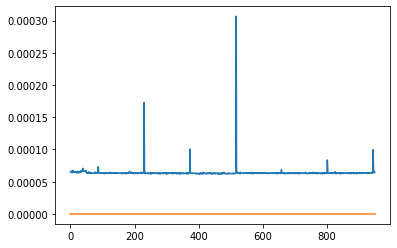

In [23]:
t[-10],len(DATA[-2])

(5.221366882324219e-05, 0)

In [24]:
DATA[0]

b''